# L14: Ensemble models

### Set up imports

In [1]:
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
    VotingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load the data

In [2]:
data = fetch_covtype()

In [4]:
# separate X and Y
X, y = data.data, data.target

print(X.shape)
print(y.shape)

# use only the first 10,000 rows
X_small = X[:10_000]
y_small = y[:10_000]

print(X_small.shape)
print(y_small.shape)

(581012, 54)
(581012,)
(10000, 54)
(10000,)


### Train-test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.3, random_state=42)

print(X_train.shape)

(7000, 54)


### Define the models

In [6]:
# define a base classifer to use in the ensemble methods
base_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# 1. bagging
bagging_clf = BaggingClassifier(estimator=base_clf, n_estimators=50, random_state=42)

# 2. random forest
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

# 3. adaptive boosting
adaboost_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=25)

# 4. gradient boosting
gb_clf = GradientBoostingClassifier(n_estimators=50, max_depth=5, random_state=42)

estimators = [
    ('rf', rf_clf),
    ('adaboost', adaboost_clf),
    ('gb', gb_clf)
]

# 5. stacking 
stacking_clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(random_state=42)
)

# 6. voting
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

### Make a dictionary of models

In [7]:
models = {
    'base': base_clf,
    'bagging': bagging_clf,
    'random forest': rf_clf,
    'adaboost': adaboost_clf,
    'gradient boost': gb_clf,
    'stacking': stacking_clf,
    'voting': voting_clf
}

### Fit and evaluate each model and save accuracy

In [11]:
accuracies = {}

for model_name, model in models.items():
    print(model_name)
    
    # fit the model
    model.fit(X_train, y_train)

    # make test set predictions
    y_pred = model.predict(X_test)

    # evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # add accuracy to the report dictionary
    accuracies[model_name] = accuracy

accuracies

base
bagging
random forest
adaboost
gradient boost
stacking
voting


{'base': 0.658,
 'bagging': 0.679,
 'random forest': 0.6796666666666666,
 'adaboost': 0.698,
 'gradient boost': 0.826,
 'stacking': 0.826,
 'voting': 0.818}

### Graph the results

<BarContainer object of 7 artists>

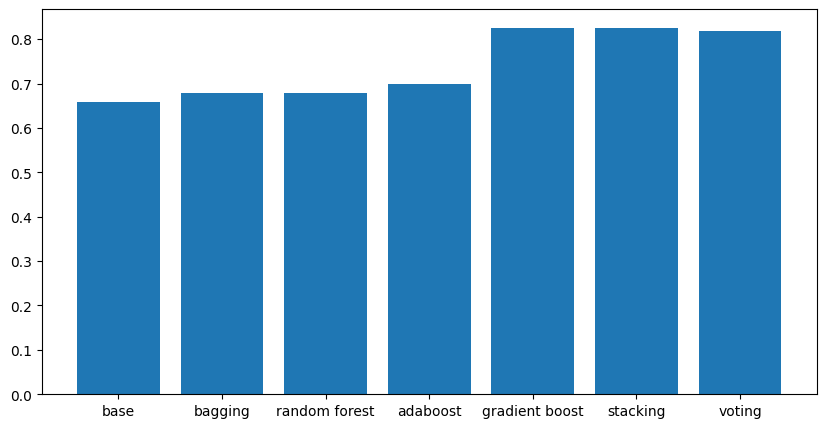

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values())

### Activity
We used the default hyperparameters for gradient boosting in this example. 

Now do a grid search to see if we can improve the test set accuracy.

In [ ]:
# import grid search
from sklearn.model_selection import GridSearchCV

In [20]:
# set up the hyperparameter grid
hyperparameter_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    # 'n_estimators': [50, 100],
    # 'loss': ['log_loss', 'exponential']
}

In [25]:
grid = GridSearchCV(estimator=gb_clf, param_grid=hyperparameter_grid, verbose=3, cv=2, n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[CV 2/2] END ................learning_rate=0.01;, score=0.713 total time=  12.3s
[CV 1/2] END ................learning_rate=0.01;, score=0.729 total time=  13.3s
[CV 1/2] END .................learning_rate=0.1;, score=0.789 total time=  10.2s
[CV 2/2] END .................learning_rate=0.1;, score=0.780 total time=   9.4s
[CV 1/2] END .................learning_rate=0.2;, score=0.806 total time=   7.6s
[CV 2/2] END .................learning_rate=0.2;, score=0.798 total time=   7.5s


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",GradientBoost...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.01, 0.1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",2
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate

In [ ]:
grid.best_params_

{'learning_rate': 0.2}

In [24]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8323333333333334